No class name found in XML: C:/Users/kaush/Downloads/skin/skin/annotation\oily\aug_0_4083.xml
Skipping aug_0_4083.jpeg due to missing class label.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,169,091 (27.35 MB)

 Trainable params: 131,587 (514.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4071 - loss: 1.4934 - val_accuracy: 0.3469 - val_loss: 1.1797
Epoch 2/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 687ms/step - accuracy: 0.7019 - loss: 0.6947 - val_accuracy: 0.8265 - val_loss: 0.5419
Epoch 3/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - accuracy: 0.8620 - loss: 0.4240 - val_accuracy: 0.8367 - val_loss: 0.4892
Epoch 4/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 696ms/step - accuracy: 0.9249 - loss: 0.3264 - val_accuracy: 0.7755 - val_loss: 0.4801
Epoch 5/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - accuracy: 0.9083 - loss: 0.2765 - val_accuracy: 0.7959 - val_loss: 0.5046
Epoch 6/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 682ms/step - accuracy: 0.9580 - loss: 0.1984 - val_accuracy: 0.6939 - val_loss: 0.6805
Epoch 7/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 724ms/step - accuracy: 0.9915 - loss: 0.1243 - val_accuracy: 0.7347 - val_loss: 0.5974
Epoch 8/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 681ms/step - accuracy: 0.9942 - loss: 0.0954 - val_accurac

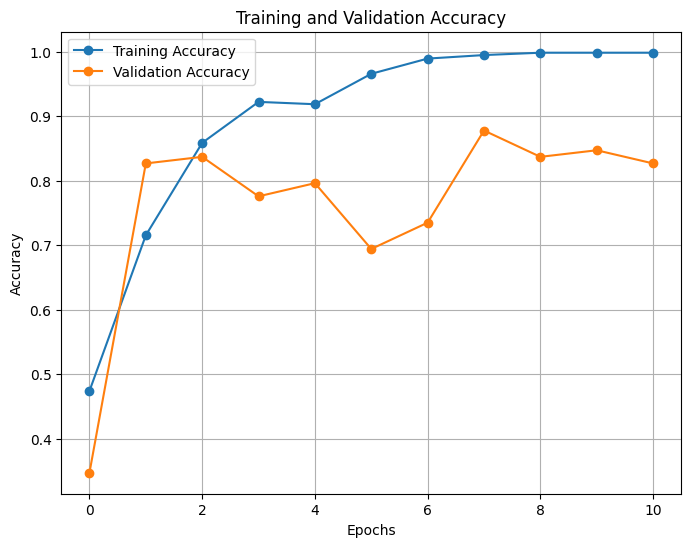

Found 76 images belonging to 3 classes.


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step - accuracy: 0.9568 - loss: 0.2478
Test Loss: 0.2472
Test Accuracy: 96.05%
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step 
Precision: 96.05%
Recall: 96.05%
F1 Score: 96.05%


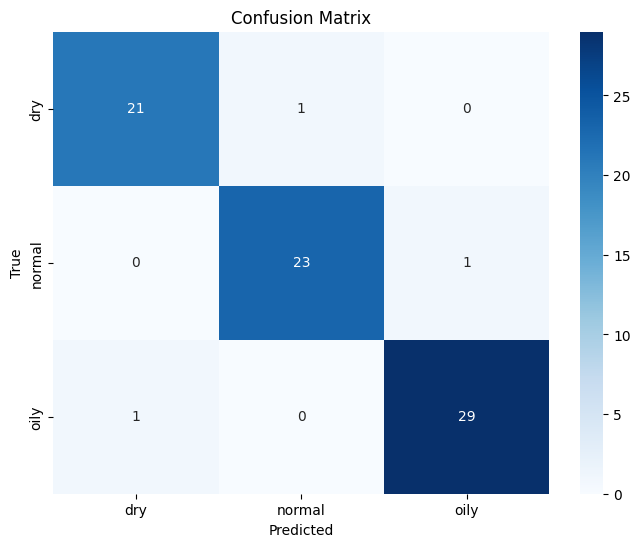


Detailed Classification Report:
              precision    recall  f1-score   support

         dry       0.95      0.95      0.95        22
      normal       0.96      0.96      0.96        24
        oily       0.97      0.97      0.97        30

    accuracy                           0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76



In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import xml.etree.ElementTree as ET

# Parse XML annotations to extract class names
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Load image paths and labels
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpeg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpeg", ".xml"))
                class_label = parse_xml(xml_file)

                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue

                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Preprocess images
def preprocess_images(image_paths, labels, img_size=(128, 128)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load training data
class_names = ["dry", "normal", "oily"]
image_dir = r"C:/Users/kaush/Downloads/SKIN_IMPLEMENTATION/skin dataset/augmented_train"
xml_dir = r"C:/Users/kaush/Downloads/skin/skin/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)

images, labels = preprocess_images(image_paths, labels)

# Define the DenseNet121 model
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(images, labels, epochs=11, validation_split=0.15, batch_size=32)

# Print training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("\nTraining and Validation Accuracy per Epoch:")
for epoch in range(len(train_accuracy)):
    print(f"Epoch {epoch + 1}: Training Accuracy = {train_accuracy[epoch]:.2f}, Validation Accuracy = {val_accuracy[epoch]:.2f}")

# Optionally, plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate and predict on test data
test_dir = r"C:/Users/kaush/Downloads/SKIN_IMPLEMENTATION/skin dataset/train1"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

preds = np.argmax(model.predict(test_data), axis=1)
true_labels = test_data.classes
class_names = list(test_data.class_indices.keys())

# Metrics
precision = 100 * precision_score(true_labels, preds, average='weighted')
recall = 100 * recall_score(true_labels, preds, average='weighted')
f1 = 100 * f1_score(true_labels, preds, average='weighted')

print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(true_labels, preds, target_names=class_names))


In [4]:
# Save the model to a file
model.save("anndense121_best_model.h5")

In [ ]:
# import os
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
# import xml.etree.ElementTree as ET

# # Parse XML annotations to extract class names
# def parse_xml(xml_file):
#     try:
#         tree = ET.parse(xml_file)
#         root = tree.getroot()
#         for obj in root.findall('object'):
#             class_name = obj.find('name').text
#             if class_name:
#                 return class_name
#         print(f"No class name found in XML: {xml_file}")
#         return None
#     except Exception as e:
#         print(f"Error parsing XML {xml_file}: {e}")
#         return None

# # Load image paths and labels
# def load_data(image_dir, xml_dir, class_names):
#     images = []
#     labels = []
#     for class_name in class_names:
#         class_folder = os.path.join(image_dir, class_name)
#         xml_folder = os.path.join(xml_dir, class_name)
#         for img_file in os.listdir(class_folder):
#             if img_file.endswith(".jpeg"):
#                 img_path = os.path.join(class_folder, img_file)
#                 xml_file = os.path.join(xml_folder, img_file.replace(".jpeg", ".xml"))
#                 class_label = parse_xml(xml_file)

#                 if class_label is None:
#                     print(f"Skipping {img_file} due to missing class label.")
#                     continue

#                 if class_label in class_names:
#                     images.append(img_path)
#                     labels.append(class_names.index(class_label))
#                 else:
#                     print(f"Warning: {class_label} is not a valid class.")
#     return images, labels

# # Preprocess images
# def preprocess_images(image_paths, labels, img_size=(224, 224)):
#     images = []
#     for img_path in image_paths:
#         try:
#             if not os.path.exists(img_path):
#                 print(f"Warning: Image path does not exist: {img_path}")
#                 continue
#             img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
#             img = tf.keras.preprocessing.image.img_to_array(img)
#             images.append(img)
#         except Exception as e:
#             print(f"Error loading image {img_path}: {e}")
    
#     images = np.array(images) / 255.0
#     labels = np.array(labels)
#     return images, labels

# # Load training data
# class_names = ["dry", "normal", "oily"]
# image_dir = r"C:/Users/kaush/Downloads/SKIN_IMPLEMENTATION/skin dataset/augmented_train"
# xml_dir = r"C:/Users/kaush/Downloads/skin/skin/annotation"
# image_paths, labels = load_data(image_dir, xml_dir, class_names)

# images, labels = preprocess_images(image_paths, labels)

# # Define the DenseNet121 model
# base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model.trainable = False

# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(len(class_names), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# # Train the model
# history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# # Print training and validation accuracy
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# print("\nTraining and Validation Accuracy per Epoch:")
# for epoch in range(len(train_accuracy)):
#     print(f"Epoch {epoch + 1}: Training Accuracy = {train_accuracy[epoch]:.2f}, Validation Accuracy = {val_accuracy[epoch]:.2f}")

# # Optionally, plot the training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(train_accuracy, label='Training Accuracy', marker='o')
# plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
# plt.title("Training and Validation Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Evaluate and predict on test data
# test_dir = r"C:/Users/kaush/Downloads/SKIN_IMPLEMENTATION/skin dataset/train1"
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# test_data = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='sparse',
#     shuffle=False
# )

# test_loss, test_accuracy = model.evaluate(test_data)
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# preds = np.argmax(model.predict(test_data), axis=1)
# true_labels = test_data.classes
# class_names = list(test_data.class_indices.keys())

# # Metrics
# precision = 100 * precision_score(true_labels, preds, average='weighted')
# recall = 100 * recall_score(true_labels, preds, average='weighted')
# f1 = 100 * f1_score(true_labels, preds, average='weighted')

# print(f"Precision: {precision:.2f}%")
# print(f"Recall: {recall:.2f}%")
# print(f"F1 Score: {f1:.2f}%")

# # Confusion Matrix
# cm = confusion_matrix(true_labels, preds)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()

# # Classification Report
# print("\nDetailed Classification Report:")
# print(classification_report(true_labels, preds, target_names=class_names))
